In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/harinyadevi/svm-email-spam-classification/main/spam.csv')

In [6]:
data

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.tail()

,Label,EmailText
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.isnull()

,Label,EmailText
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [12]:
X = data['EmailText'].values
y = data['Label'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=0)

In [14]:
train_test_split(y, shuffle=False)

[array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object),
 array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)]

In [15]:
# Converting String to Integer
cv = CountVectorizer()  
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [16]:
print(X_train)

  (0, 2442)	1
  (0, 3617)	1
  (0, 1183)	1
  (0, 2245)	1
  (0, 43)	1
  (0, 5310)	2
  (0, 1349)	1
  (0, 5933)	1
  (0, 2464)	1
  (0, 172)	1
  (0, 1239)	1
  (0, 3777)	1
  (0, 240)	1
  (0, 2360)	1
  (0, 4852)	1
  (0, 3162)	1
  (0, 3767)	1
  (0, 3681)	1
  (1, 5915)	1
  (1, 5737)	1
  (1, 2838)	1
  (1, 5217)	1
  (1, 755)	1
  (1, 611)	1
  (2, 5217)	1
  :	:
  (2783, 3796)	1
  (2783, 5344)	1
  (2783, 3785)	1
  (2783, 5632)	1
  (2783, 1733)	1
  (2784, 5930)	1
  (2784, 2536)	1
  (2784, 3128)	1
  (2784, 5903)	1
  (2784, 3187)	1
  (2784, 1715)	1
  (2784, 4413)	1
  (2784, 3234)	1
  (2784, 4915)	1
  (2785, 5310)	2
  (2785, 5930)	3
  (2785, 606)	1
  (2785, 5166)	1
  (2785, 2666)	1
  (2785, 2553)	1
  (2785, 4997)	1
  (2785, 5822)	2
  (2785, 726)	1
  (2785, 5117)	1
  (2785, 1604)	1


In [17]:
print(X_test)

  (0, 628)	1
  (0, 1413)	1
  (0, 2937)	1
  (0, 3054)	1
  (0, 3972)	1
  (0, 4648)	1
  (0, 5310)	1
  (0, 5335)	1
  (0, 5504)	1
  (1, 2077)	1
  (1, 3764)	1
  (1, 5217)	1
  (1, 5655)	1
  (2, 669)	1
  (2, 694)	1
  (2, 764)	1
  (2, 1467)	1
  (2, 1495)	1
  (2, 1772)	2
  (2, 2029)	1
  (2, 2114)	1
  (2, 2206)	1
  (2, 2487)	1
  (2, 2581)	1
  (2, 2726)	1
  :	:
  (2784, 5655)	1
  (2784, 5707)	1
  (2785, 1063)	1
  (2785, 1154)	1
  (2785, 1427)	1
  (2785, 1501)	1
  (2785, 1692)	1
  (2785, 1880)	1
  (2785, 2206)	1
  (2785, 2354)	1
  (2785, 2393)	1
  (2785, 2545)	1
  (2785, 2582)	1
  (2785, 2726)	1
  (2785, 2735)	1
  (2785, 2754)	2
  (2785, 3084)	1
  (2785, 3128)	1
  (2785, 3199)	1
  (2785, 3356)	1
  (2785, 3540)	1
  (2785, 5310)	1
  (2785, 5678)	1
  (2785, 5715)	1
  (2785, 5768)	1


In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))

0.9691313711414213


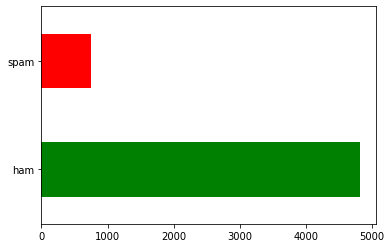

In [19]:
n=pd.value_counts(data["Label"], sort= True)
n.plot(kind= 'barh', color= ["green", "red"])
#plt.title('Bar chart')
plt.show()

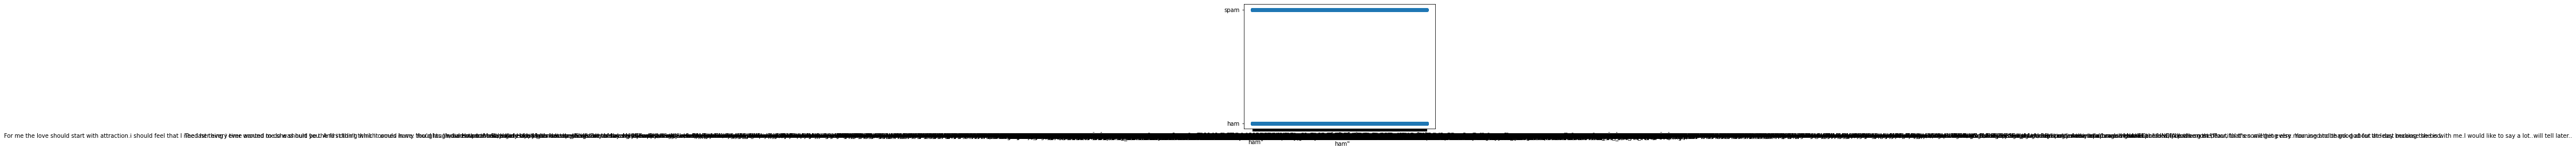

In [20]:
X = data['EmailText'].values
y = data['Label'].values
plt.scatter(X,y)
plt.show()

In [21]:
count1 = Counter(" ".join(data[data['Label']=='ham']["EmailText"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['Label']=='spam']["EmailText"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

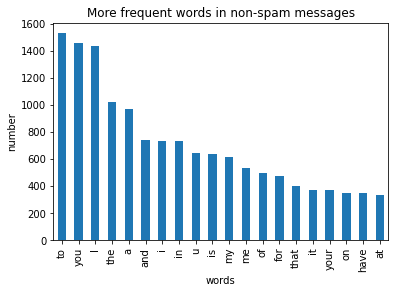

In [22]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

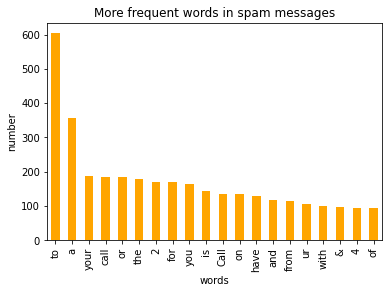

In [23]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()